[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AleksUv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AleksUv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


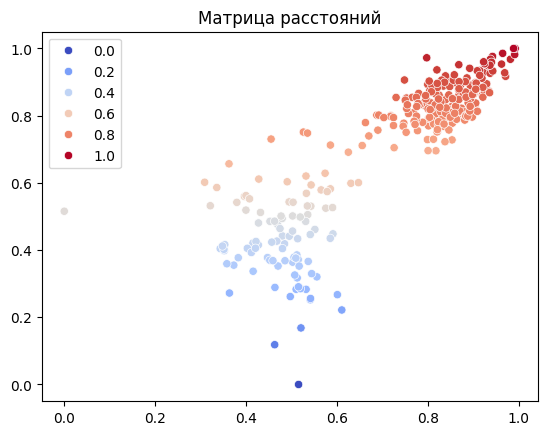

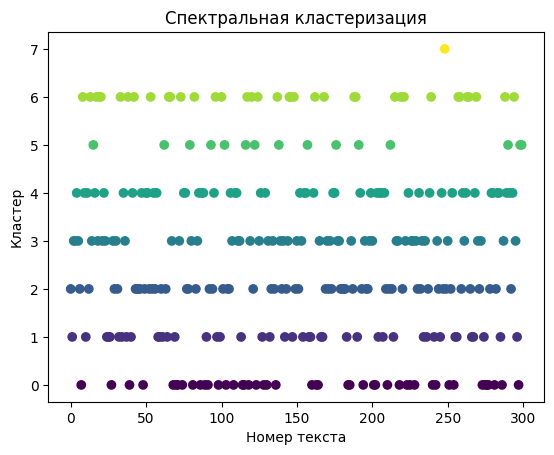

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import SpectralClustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pymorphy3

# Загрузка стоп-слов
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('russian'))

# Предварительная обработка текстов
def preprocess_text(text):
#    tokens = nltk.word_tokenize(text)  # Токенизация
#    tokens = [word.lower() for word in tokens if word.isalpha()]  # Удаление пунктуации и чисел, приведение к нижнему регистру
#    tokens = [word for word in tokens if word not in stop_words]  # Удаление стоп-слов
#    morph_analyzer = MorphAnalyzer()
#    lemmatized_tokens = []
#    for word in tokens:
#        parsed_word = morph_analyzer.parse(word)[0]
#        lemma = parsed_word.normal_form
#        lemmatized_tokens.append(lemma)
#    return ' '.join(lemmatized_tokens)
    tokens = word_tokenize(text) # получение токенов
    morph = pymorphy3.MorphAnalyzer()    
    tokens = [morph.parse(token)[0].normal_form for token in tokens if token.isalnum() and not token.isdigit()]
    tokens = [token for token in tokens if token not in stopwords.words('russian')]
    return ' '.join(tokens)   

# Путь к папке с файлами
folder_path = 'sport_2021'

# Получаем список файлов в папке
files = os.listdir(folder_path)

# Считываем тексты из файлов и выполняем предварительную обработку
text_collection = []
for file in files:
    with open(os.path.join(folder_path, file), 'r', encoding='utf-8') as f:
        text = f.read()
        text_collection.append(text)

# Предварительная обработка коллекции текстов
preprocessed_collection = [preprocess_text(text) for text in text_collection]

# Создание корпуса
corpus = preprocessed_collection

# Векторизация текстов
vectorizer = CountVectorizer(max_features=150)
X = vectorizer.fit_transform(corpus)

# Построение матрицы расстояний
distances = squareform(pdist(X.toarray(), metric='cosine'))

# Кластеризация
spectral = SpectralClustering(affinity='precomputed', random_state=0)
clusters = spectral.fit_predict(distances)

# Вывод графиков
x = distances[:, 0]
y = distances[:, 1]

# Визуализация кластеров
sns.scatterplot(x=x, y=y, hue=distances[:, 1], palette='coolwarm', marker='o')
plt.title('Матрица расстояний')
plt.show()

plt.scatter(range(len(corpus)), clusters, c=clusters, cmap='viridis')
plt.title('Спектральная кластеризация')
plt.xlabel('Номер текста')
plt.ylabel('Кластер')
plt.show()